In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [2]:
movie_data = pd.read_csv("movies.dat" , sep= "::" , names = ["MovieID" , "Title" , "Genres"])
rating_data = pd.read_csv("ratings.dat" , sep= "::" , names = ["UserID" , "MovieID" , "Rating" , "Timestamp"])
user_data = pd.read_csv("users.dat" , sep= "::" , names = ["UserID" , "Genere" , "Age" , "Occupation" , "Zip-code"])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel 

In [3]:
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
user_data.head()

,UserID,Genere,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Genere      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [4]:
#As there is no NULL value Let's start merging
#First merging on MOvieID

merge1 = pd.merge(movie_data,rating_data, on="MovieID")

In [46]:
merge1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [12]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MovieID    1000209 non-null  int64 
 1   Title      1000209 non-null  object
 2   Genres     1000209 non-null  object
 3   UserID     1000209 non-null  int64 
 4   Rating     1000209 non-null  int64 
 5   Timestamp  1000209 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [5]:
#Let's Create Master Data BY Merging on UserID

master_data = pd.merge(merge1,user_data, on="UserID")

In [14]:
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Genere,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [15]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Genere      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [22]:
#Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
# 1) User Age Distribution
# 2) User rating of the movie “Toy Story”
# 3) Top 25 movies by viewership rating
# 4) Find the ratings for all the movies reviewed by for a particular user of user id = 2696

Text(0.5, 1.0, 'User Age Distribution')

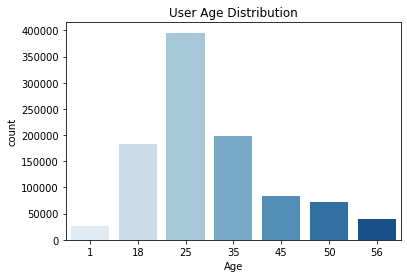

In [6]:
# 1) User Age Distribution
plot1 = sn.countplot(x = "Age", data= master_data, palette="Blues")
plt.title("User Age Distribution")

In [17]:
# 2) User rating of the movie “Toy Story”
master_data.describe()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


Text(0.5, 1.0, 'User Age Distribution')

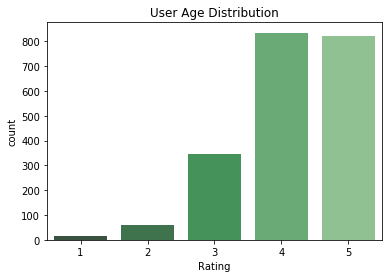

In [7]:
plot2 = sn.countplot(x = "Rating", data=master_data[master_data["Title"] == "Toy Story (1995)"] , palette="Greens_d")
plt.title("User Age Distribution")

In [8]:
master_data["Rating"][master_data["Title"] == "Toy Story (1995)"].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

In [9]:
# 3) Top 25 movies by viewership rating
topMovies = master_data["Title"][master_data["Rating"] == 5].value_counts()

In [52]:
topMovies.head(25)

American Beauty (1999)                                   1963
Star Wars: Episode IV - A New Hope (1977)                1826
Raiders of the Lost Ark (1981)                           1500
Star Wars: Episode V - The Empire Strikes Back (1980)    1483
Schindler's List (1993)                                  1475
Godfather, The (1972)                                    1475
Shawshank Redemption, The (1994)                         1457
Matrix, The (1999)                                       1430
Saving Private Ryan (1998)                               1405
Sixth Sense, The (1999)                                  1385
Silence of the Lambs, The (1991)                         1350
Fargo (1996)                                             1278
Braveheart (1995)                                        1206
Pulp Fiction (1994)                                      1193
Princess Bride, The (1987)                               1186
Usual Suspects, The (1995)                               1144
Star War

In [10]:
# 4) Find the ratings for all the movies reviewed by for a particular user of user id = 2696
master_data.set_index("UserID", inplace=True)

In [54]:
master_data.head()

,MovieID,Title,Genres,Rating,Timestamp,Genere,Age,Occupation,Zip-code
UserID,,,,,,,,,
1,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351,F,1,10,48067
1,150,Apollo 13 (1995),Drama,5,978301777,F,1,10,48067
1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760,F,1,10,48067
1,527,Schindler's List (1993),Drama|War,5,978824195,F,1,10,48067


In [11]:
userID_2696 = master_data.loc[2696 , ["Title","Rating"]]

In [12]:
userID_2696

,Title,Rating
UserID,,
2696,"Client, The (1994)",3
2696,Lone Star (1996),5
2696,Basic Instinct (1992),4
2696,E.T. the Extra-Terrestrial (1982),3
2696,"Shining, The (1980)",4
2696,Back to the Future (1985),2
2696,Cop Land (1997),3
2696,L.A. Confidential (1997),4
2696,"Game, The (1997)",4


In [26]:
#Feature Engineering:
#           Use column genres:

# 1) Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
# 2) Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
# 3) Determine the features affecting the ratings of any particular movie.
# 4) Develop an appropriate model to predict the movie ratings

In [13]:
# Split genres

genres_Split = master_data

In [14]:
genres_Split.columns

Index(['MovieID', 'Title', 'Genres', 'Rating', 'Timestamp', 'Genere', 'Age',
       'Occupation', 'Zip-code'],
      dtype='object')

In [15]:
genres_Split["Genres"].unique().tolist()

["Animation|Children's|Comedy",
 "Animation|Children's|Musical|Romance",
 'Drama',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Drama|War',
 "Children's|Drama",
 "Animation|Children's|Comedy|Musical",
 "Animation|Children's|Musical",
 'Crime|Drama|Thriller',
 'Animation',
 'Animation|Comedy|Thriller',
 'Musical|Romance',
 "Adventure|Children's|Drama|Musical",
 'Musical',
 "Children's|Comedy|Musical",
 "Children's|Drama|Fantasy|Sci-Fi",
 'Action|Adventure|Comedy|Romance',
 'Comedy|Sci-Fi',
 'Action|Adventure|Drama',
 "Adventure|Animation|Children's|Comedy|Musical",
 'Drama|Romance',
 "Animation|Children's",
 'Action|Drama|War',
 'Comedy',
 'Romance',
 'Action|Crime|Romance',
 'Thriller',
 'Comedy|Fantasy',
 'Comedy|Drama',
 "Children's|Comedy|Drama",
 'Drama|Musical',
 'Drama|Romance|War|Western',
 'Crime|Drama',
 'Action|Comedy|Western',
 'Action|Romance|Thriller',
 'Western',
 "Children's|Comedy",
 'Adventure|Drama|Western',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Drama|Romance|War',
 

In [16]:
genres_Split[["Genres1" , "Genres2" ,"Genres3" ,"Genres4" ,"Genres5" ,"Genres6"]] = genres_Split.Genres.str.split("|",expand=True)

In [60]:
genres_Split.head()

,MovieID,Title,Genres,Rating,Timestamp,Genere,Age,Occupation,Zip-code,Genres1,Genres2,Genres3,Genres4,Genres5,Genres6
UserID,,,,,,,,,,,,,,,
1,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268,F,1,10,48067,Animation,Children's,Comedy,None,None,None
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351,F,1,10,48067,Animation,Children's,Musical,Romance,None,None
1,150,Apollo 13 (1995),Drama,5,978301777,F,1,10,48067,Drama,None,None,None,None,None
1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760,F,1,10,48067,Action,Adventure,Fantasy,Sci-Fi,None,None
1,527,Schindler's List (1993),Drama|War,5,978824195,F,1,10,48067,Drama,War,None,None,None,None


In [32]:
genres_Split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 1 to 5727
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   Rating      1000209 non-null  int64 
 4   Timestamp   1000209 non-null  int64 
 5   Genere      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
 8   Zip-code    1000209 non-null  object
 9   Genres1     1000209 non-null  object
 10  Genres2     689510 non-null   object
 11  Genres3     304986 non-null   object
 12  Genres4     93496 non-null    object
 13  Genres5     13383 non-null    object
 14  Genres6     231 non-null      object
dtypes: int64(5), object(10)
memory usage: 142.1+ MB


In [17]:
pd.unique(genres_Split[["Genres1" , "Genres2" ,"Genres3" ,"Genres4" ,"Genres5" ,"Genres6"]].values.ravel()).tolist()

['Animation',
 "Children's",
 'Comedy',
 None,
 'Musical',
 'Romance',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'War',
 'Crime',
 'Thriller',
 'Western',
 'Horror',
 'Mystery',
 'Documentary',
 'Film-Noir']

In [18]:
encode_columns = ["Genres1" , "Genres2" ,"Genres3" ,"Genres4" ,"Genres5" ,"Genres6"]

In [19]:
genres_encode = pd.get_dummies(genres_Split, prefix_sep='_', columns= encode_columns)

In [20]:
genres_encode.head()

,MovieID,Title,Genres,Rating,Timestamp,Genere,Age,Occupation,Zip-code,Genres1_Action,...,Genres4_Thriller,Genres4_War,Genres4_Western,Genres5_Fantasy,Genres5_Musical,Genres5_Romance,Genres5_Sci-Fi,Genres5_Thriller,Genres5_War,Genres6_War
UserID,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,150,Apollo 13 (1995),Drama,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760,F,1,10,48067,1,...,0,0,0,0,0,0,0,0,0,0
1,527,Schindler's List (1993),Drama|War,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
genres_encode.columns

Index(['MovieID', 'Title', 'Genres', 'Rating', 'Timestamp', 'Genere', 'Age',
       'Occupation', 'Zip-code', 'Genres1_Action', 'Genres1_Adventure',
       'Genres1_Animation', 'Genres1_Children's', 'Genres1_Comedy',
       'Genres1_Crime', 'Genres1_Documentary', 'Genres1_Drama',
       'Genres1_Fantasy', 'Genres1_Film-Noir', 'Genres1_Horror',
       'Genres1_Musical', 'Genres1_Mystery', 'Genres1_Romance',
       'Genres1_Sci-Fi', 'Genres1_Thriller', 'Genres1_War', 'Genres1_Western',
       'Genres2_Adventure', 'Genres2_Animation', 'Genres2_Children's',
       'Genres2_Comedy', 'Genres2_Crime', 'Genres2_Documentary',
       'Genres2_Drama', 'Genres2_Fantasy', 'Genres2_Film-Noir',
       'Genres2_Horror', 'Genres2_Musical', 'Genres2_Mystery',
       'Genres2_Romance', 'Genres2_Sci-Fi', 'Genres2_Thriller', 'Genres2_War',
       'Genres2_Western', 'Genres3_Animation', 'Genres3_Children's',
       'Genres3_Comedy', 'Genres3_Crime', 'Genres3_Drama', 'Genres3_Fantasy',
       'Genres3_Film-N

In [21]:
# Create Features
features_pca = genres_encode.loc[:, 'Genere' : 'Genres6_War']

In [67]:
type(features_pca)

pandas.core.frame.DataFrame

In [68]:
features_pca.head()

,Genere,Age,Occupation,Zip-code,Genres1_Action,Genres1_Adventure,Genres1_Animation,Genres1_Children's,Genres1_Comedy,Genres1_Crime,...,Genres4_Thriller,Genres4_War,Genres4_Western,Genres5_Fantasy,Genres5_Musical,Genres5_Romance,Genres5_Sci-Fi,Genres5_Thriller,Genres5_War,Genres6_War
UserID,,,,,,,,,,,,,,,,,,,,,
1,F,1,10,48067,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,48067,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,48067,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,48067,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,48067,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
features_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 1 to 5727
Data columns (total 74 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Genere               1000209 non-null  object
 1   Age                  1000209 non-null  int64 
 2   Occupation           1000209 non-null  int64 
 3   Zip-code             1000209 non-null  object
 4   Genres1_Action       1000209 non-null  uint8 
 5   Genres1_Adventure    1000209 non-null  uint8 
 6   Genres1_Animation    1000209 non-null  uint8 
 7   Genres1_Children's   1000209 non-null  uint8 
 8   Genres1_Comedy       1000209 non-null  uint8 
 9   Genres1_Crime        1000209 non-null  uint8 
 10  Genres1_Documentary  1000209 non-null  uint8 
 11  Genres1_Drama        1000209 non-null  uint8 
 12  Genres1_Fantasy      1000209 non-null  uint8 
 13  Genres1_Film-Noir    1000209 non-null  uint8 
 14  Genres1_Horror       1000209 non-null  uint8 
 15  Genres1_Musical   

In [22]:
# dummyfing Gender, Age, Zip Code
age_Columns = ['Genere']
#Create Features
features_pca1 = pd.get_dummies(features_pca, prefix_sep='_', columns=age_Columns)

In [70]:
features_pca1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 1 to 5727
Data columns (total 75 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Age                  1000209 non-null  int64 
 1   Occupation           1000209 non-null  int64 
 2   Zip-code             1000209 non-null  object
 3   Genres1_Action       1000209 non-null  uint8 
 4   Genres1_Adventure    1000209 non-null  uint8 
 5   Genres1_Animation    1000209 non-null  uint8 
 6   Genres1_Children's   1000209 non-null  uint8 
 7   Genres1_Comedy       1000209 non-null  uint8 
 8   Genres1_Crime        1000209 non-null  uint8 
 9   Genres1_Documentary  1000209 non-null  uint8 
 10  Genres1_Drama        1000209 non-null  uint8 
 11  Genres1_Fantasy      1000209 non-null  uint8 
 12  Genres1_Film-Noir    1000209 non-null  uint8 
 13  Genres1_Horror       1000209 non-null  uint8 
 14  Genres1_Musical      1000209 non-null  uint8 
 15  Genres1_Mystery   

In [28]:
features_pca1.head()

,Age,Occupation,Zip-code,Genres1_Action,Genres1_Adventure,Genres1_Animation,Genres1_Children's,Genres1_Comedy,Genres1_Crime,Genres1_Documentary,...,Genres4_Western,Genres5_Fantasy,Genres5_Musical,Genres5_Romance,Genres5_Sci-Fi,Genres5_Thriller,Genres5_War,Genres6_War,Genere_F,Genere_M
UserID,,,,,,,,,,,,,,,,,,,,,
1,1,10,48067,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,48067,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,48067,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,48067,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,48067,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
features_pca1.columns

Index(['Age', 'Occupation', 'Zip-code', 'Genres1_Action', 'Genres1_Adventure',
       'Genres1_Animation', 'Genres1_Children's', 'Genres1_Comedy',
       'Genres1_Crime', 'Genres1_Documentary', 'Genres1_Drama',
       'Genres1_Fantasy', 'Genres1_Film-Noir', 'Genres1_Horror',
       'Genres1_Musical', 'Genres1_Mystery', 'Genres1_Romance',
       'Genres1_Sci-Fi', 'Genres1_Thriller', 'Genres1_War', 'Genres1_Western',
       'Genres2_Adventure', 'Genres2_Animation', 'Genres2_Children's',
       'Genres2_Comedy', 'Genres2_Crime', 'Genres2_Documentary',
       'Genres2_Drama', 'Genres2_Fantasy', 'Genres2_Film-Noir',
       'Genres2_Horror', 'Genres2_Musical', 'Genres2_Mystery',
       'Genres2_Romance', 'Genres2_Sci-Fi', 'Genres2_Thriller', 'Genres2_War',
       'Genres2_Western', 'Genres3_Animation', 'Genres3_Children's',
       'Genres3_Comedy', 'Genres3_Crime', 'Genres3_Drama', 'Genres3_Fantasy',
       'Genres3_Film-Noir', 'Genres3_Horror', 'Genres3_Musical',
       'Genres3_Mystery', '

In [23]:
features_pca1['Zip-code'].unique().tolist()

['48067',
 '55117',
 '11413',
 '61614',
 '95370',
 '95825',
 '48073',
 '99353',
 '90049',
 '23112',
 '14607',
 '02135',
 '94123',
 '02215',
 '98052',
 '94110',
 '92107',
 '77084',
 '10562',
 '60440',
 '72118',
 '55803',
 '53706',
 '01748',
 '55413',
 '98029',
 '49327',
 '85749',
 '44243',
 '78028',
 '19390',
 '92028',
 '97209',
 '83712',
 '33314',
 '22315',
 '77515',
 '75229',
 '67208',
 '06520',
 '99709',
 '66212',
 '21202',
 '45409',
 '10011',
 '10954',
 '91360',
 '57747',
 '29205',
 '98144',
 '85013',
 '48104',
 '14519',
 '12866',
 '93117',
 '46970',
 '55439',
 '45237',
 '95123',
 '33186',
 '03052',
 '19001',
 '91767',
 '94061',
 '55125',
 '44106',
 '29146',
 '10458',
 '55108',
 '92123',
 '01609',
 '80218',
 '92075',
 '22903',
 '28262',
 '14850',
 '11215',
 '43210',
 '55455',
 '55408',
 '55126',
 '46835',
 '94618',
 '11576',
 '60625',
 '85310',
 '55436',
 '22304',
 '20755',
 '48202',
 '80302',
 '55427',
 '91910',
 '55337-4056',
 '43147',
 '97370',
 '78664',
 '61820',
 '04901',
 '530

In [24]:
features_pca1['Zip-code'][features_pca1['Zip-code'] == '98043-3621'] = '98043'
features_pca1['Zip-code'][features_pca1['Zip-code'] == '62263-3004'] = '62263'
features_pca1['Zip-code'][features_pca1['Zip-code'] == '15701-1348' ]= '15701'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [25]:
feature_pca2 = features_pca1.drop(['Zip-code'] , axis= 1)

In [26]:
feature_pca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 1 to 5727
Data columns (total 74 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   Age                  1000209 non-null  int64
 1   Occupation           1000209 non-null  int64
 2   Genres1_Action       1000209 non-null  uint8
 3   Genres1_Adventure    1000209 non-null  uint8
 4   Genres1_Animation    1000209 non-null  uint8
 5   Genres1_Children's   1000209 non-null  uint8
 6   Genres1_Comedy       1000209 non-null  uint8
 7   Genres1_Crime        1000209 non-null  uint8
 8   Genres1_Documentary  1000209 non-null  uint8
 9   Genres1_Drama        1000209 non-null  uint8
 10  Genres1_Fantasy      1000209 non-null  uint8
 11  Genres1_Film-Noir    1000209 non-null  uint8
 12  Genres1_Horror       1000209 non-null  uint8
 13  Genres1_Musical      1000209 non-null  uint8
 14  Genres1_Mystery      1000209 non-null  uint8
 15  Genres1_Romance      1000209 non-nu

In [27]:
feature_pca2.head()

,Age,Occupation,Genres1_Action,Genres1_Adventure,Genres1_Animation,Genres1_Children's,Genres1_Comedy,Genres1_Crime,Genres1_Documentary,Genres1_Drama,...,Genres4_Western,Genres5_Fantasy,Genres5_Musical,Genres5_Romance,Genres5_Sci-Fi,Genres5_Thriller,Genres5_War,Genres6_War,Genere_F,Genere_M
UserID,,,,,,,,,,,,,,,,,,,,,
1,1,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [30]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

In [31]:
feature_PCA2 = StandardScaler().fit_transform(feature_pca2)
pca  = PCA(n_components=3)
fit = pca.fit(feature_PCA2)

In [32]:
print(fit.explained_variance_ratio_)
fit_data = pd.DataFrame(pca.components_)
fit_data.head()

[0.04022538 0.03716001 0.03663904]


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.043270,0.009371,0.167453,0.230176,0.180053,0.021077,-0.158602,-0.038354,-0.013636,-0.134868,...,-0.013868,0.226202,0.204482,0.126202,0.140653,0.105680,0.085320,0.107861,-0.048774,0.048774
1,0.021203,-0.026736,-0.336812,0.107111,-0.058288,-0.029222,0.148212,0.014944,0.013518,0.129195,...,0.004350,0.230798,0.234437,-0.037740,-0.106620,-0.034770,-0.138022,0.061955,0.117295,-0.117295
2,-0.014677,-0.030062,-0.264367,0.070412,0.396535,0.001724,0.038100,-0.051600,0.005833,0.041310,...,-0.008109,-0.125489,-0.100442,0.239808,0.058714,-0.070637,-0.100544,-0.064943,0.136618,-0.136618


In [83]:
feature_pca2

,Age,Occupation,Genres1_Action,Genres1_Adventure,Genres1_Animation,Genres1_Children's,Genres1_Comedy,Genres1_Crime,Genres1_Documentary,Genres1_Drama,...,Genres4_Western,Genres5_Fantasy,Genres5_Musical,Genres5_Romance,Genres5_Sci-Fi,Genres5_Thriller,Genres5_War,Genres6_War,Genere_F,Genere_M
UserID,,,,,,,,,,,,,,,,,,,,,
1,1,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,25,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5727,25,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5727,25,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
fit_data.columns = feature_pca2.columns.values
fit_data.head()

,Age,Occupation,Genres1_Action,Genres1_Adventure,Genres1_Animation,Genres1_Children's,Genres1_Comedy,Genres1_Crime,Genres1_Documentary,Genres1_Drama,...,Genres4_Western,Genres5_Fantasy,Genres5_Musical,Genres5_Romance,Genres5_Sci-Fi,Genres5_Thriller,Genres5_War,Genres6_War,Genere_F,Genere_M
0,-0.043270,0.009371,0.167453,0.230176,0.180053,0.021077,-0.158602,-0.038354,-0.013636,-0.134868,...,-0.013868,0.226202,0.204482,0.126202,0.140653,0.105680,0.085320,0.107861,-0.048774,0.048774
1,0.021203,-0.026736,-0.336812,0.107111,-0.058288,-0.029222,0.148212,0.014944,0.013518,0.129195,...,0.004350,0.230798,0.234437,-0.037740,-0.106620,-0.034770,-0.138022,0.061955,0.117295,-0.117295
2,-0.014677,-0.030062,-0.264367,0.070412,0.396535,0.001724,0.038100,-0.051600,0.005833,0.041310,...,-0.008109,-0.125489,-0.100442,0.239808,0.058714,-0.070637,-0.100544,-0.064943,0.136618,-0.136618


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [38]:
type(feature_pca2)

pandas.core.frame.DataFrame

In [40]:
feature_pca2.columns

Index(['Age', 'Occupation', 'Genres1_Action', 'Genres1_Adventure',
       'Genres1_Animation', 'Genres1_Children's', 'Genres1_Comedy',
       'Genres1_Crime', 'Genres1_Documentary', 'Genres1_Drama',
       'Genres1_Fantasy', 'Genres1_Film-Noir', 'Genres1_Horror',
       'Genres1_Musical', 'Genres1_Mystery', 'Genres1_Romance',
       'Genres1_Sci-Fi', 'Genres1_Thriller', 'Genres1_War', 'Genres1_Western',
       'Genres2_Adventure', 'Genres2_Animation', 'Genres2_Children's',
       'Genres2_Comedy', 'Genres2_Crime', 'Genres2_Documentary',
       'Genres2_Drama', 'Genres2_Fantasy', 'Genres2_Film-Noir',
       'Genres2_Horror', 'Genres2_Musical', 'Genres2_Mystery',
       'Genres2_Romance', 'Genres2_Sci-Fi', 'Genres2_Thriller', 'Genres2_War',
       'Genres2_Western', 'Genres3_Animation', 'Genres3_Children's',
       'Genres3_Comedy', 'Genres3_Crime', 'Genres3_Drama', 'Genres3_Fantasy',
       'Genres3_Film-Noir', 'Genres3_Horror', 'Genres3_Musical',
       'Genres3_Mystery', 'Genres3_Roma

In [57]:
X_train, X_test = train_test_split(feature_pca2, test_size =0.3,random_state = 42)

In [49]:
km = KMeans(n_clusters=7)    
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [46]:
predict = km.predict(X_test)

In [51]:
predict1 = km.fit_predict(X_test)

In [50]:
print(km.labels_)

[2 0 3 ... 2 0 4]


In [59]:
print(km.predict(X_test))

[0 2 5 ... 5 4 4]
